## Aufgabe1

Stellen Sie mehrere Perioden des Signals graphisch dar. Bestimmen Sie anhand des Plots die Grundperiode (in ms) und die Grundfrequenz (in Hz) des Signals. Wie groß sind Signaldauer (in s), Abtastfrequenz (in Hz), Signallänge M (Anzahl der Abtastzeitpunkte) und Abtastintervall

In [172]:
import numpy as np
from matplotlib import pyplot as plt
from io import StringIO as sIO
import math

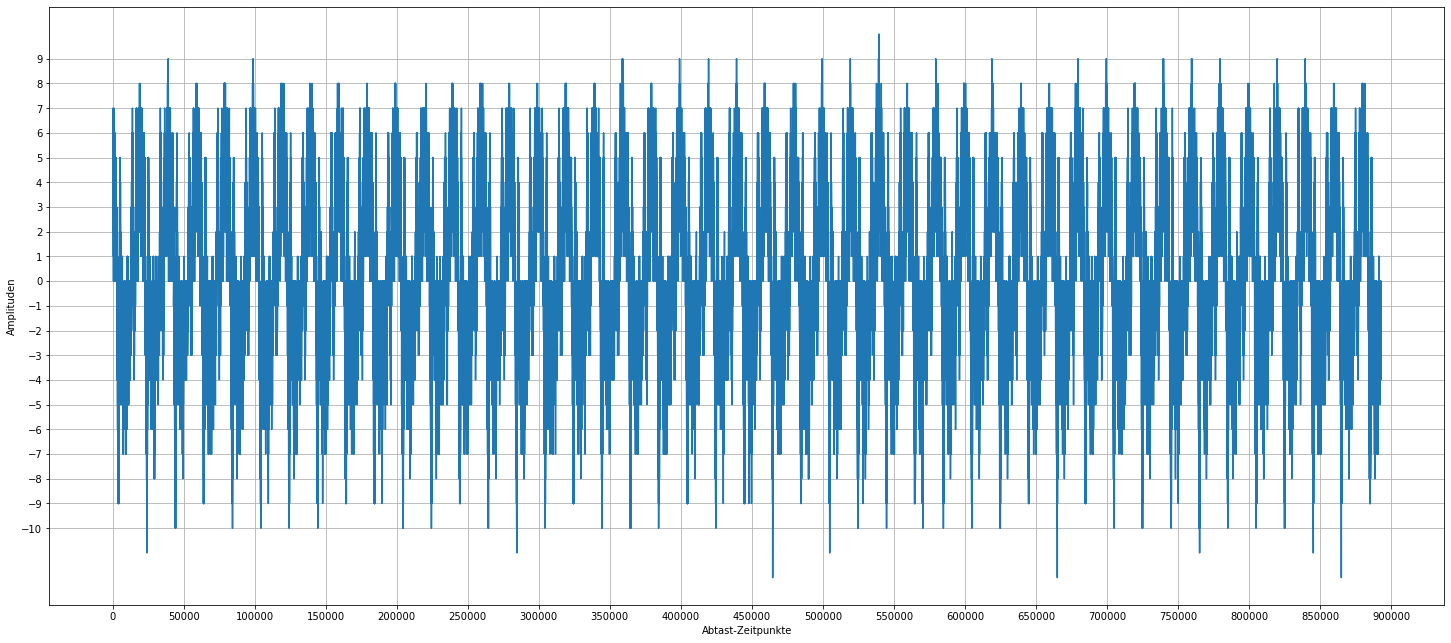

In [173]:
with open("MundharmonikaNeu.csv") as file:
        txt = file.read()

        txt = txt.replace(",", ".")
        a = np.genfromtxt(sIO(txt), skip_header=2, dtype = int, delimiter=";", usecols=(1,))

## ft = fouriertransformierte
ft = np.fft.fft(a)

fig, aax = plt.subplots(figsize=(25, 11))

yWerte = np.arange(-10, 10, 1).tolist()
plt.yticks(yWerte)
xWerte = np.arange(0, 1000000, 50000).tolist()
plt.xticks(xWerte)

plt.grid()

aax.set_xlabel('Abtast-Zeitpunkte')
aax.set_ylabel('Amplituden')


aax.plot(a)


In [174]:
with open("MundharmonikaNeu.csv") as file:
        txt = file.read()

        txt = txt.replace(",", ".")
        tArr = np.genfromtxt(sIO(txt), skip_header=2, dtype = float, delimiter=";", usecols=(0,))

## t = Zeit in ms
t = (abs(tArr[0]) + tArr[tArr.size -1])
print(f"\n> Zeit des Signals in ms: {t}")
print(f"> Zeit des Signals in s: {(t / 1000)}")

## m = Länge des Signals in Abtastzeitpunkten
m = tArr.size
print(f"\n> Zahl der Abtastzeitpunkte: {m}")

## deltaT = Abtastintervall
deltaT = (t / 1000) / m
print(f"\n> Abtastintervall in s : {deltaT}")

## af = Abtastfrequenz in Hz
aF = 1 / deltaT
print(f"> Abtastfrequenz in Hz : {aF}")


> Zeit des Signals in ms: 50.00015779
> Zeit des Signals in s: 0.050000157790000006

> Zahl der Abtastzeitpunkte: 892861

> Abtastintervall in s : 5.5999934805081646e-08
> Abtastfrequenz in Hz : 17857163.646362964


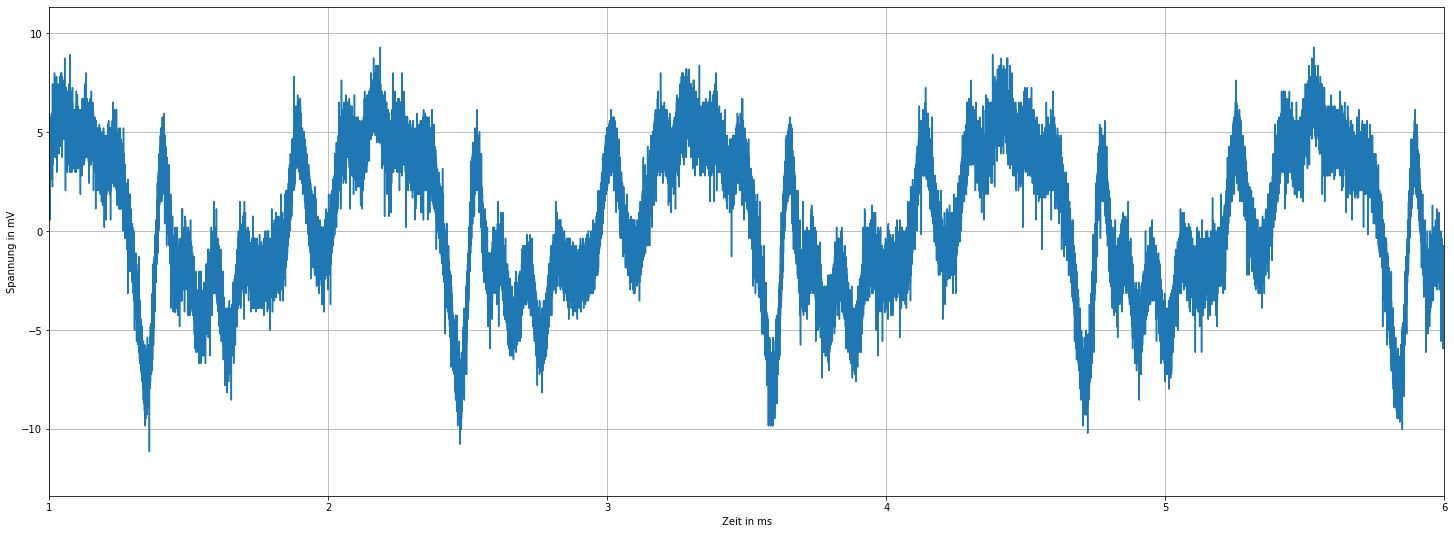

In [175]:
#Signal über 5ms

with open("MundharmonikaNeu.csv") as file:

        txt = file.read()
        txt = txt.replace(",", ".")

        tArr = np.genfromtxt(sIO(txt), skip_header=2, dtype = None, delimiter=";")
        data = np.array([entry[0] for entry in tArr]), np.array([entry[1] for entry in tArr])



bfig, bax = plt.subplots(figsize=(25, 9))

bax.set_ylabel('Spannung in mV')
bax.set_xlabel('Zeit in ms')
bax.grid()


bax.set_xlim(1, 6)
bax.plot(data[0], data[1])

plt.show()

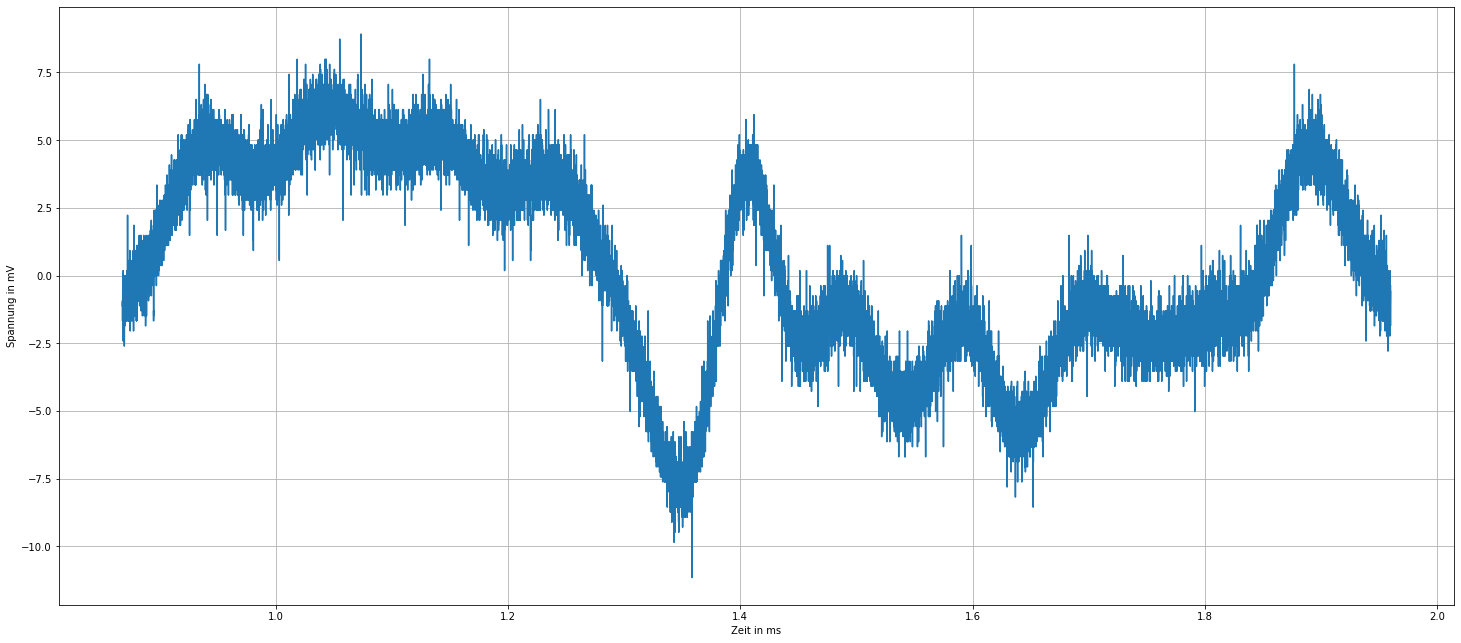

In [176]:
#Einzelne Periode

cfig, cax = plt.subplots(figsize=(25, 11))


cax.plot(data[0][15500:35000], data[1][15500:35000])

cax.set_ylabel('Spannung in mV')
cax.set_xlabel('Zeit in ms')
cax.grid()

plt.show()

Periodendauer in ms [1.11999995]
Frequenz in Hz [892.8571827168386]


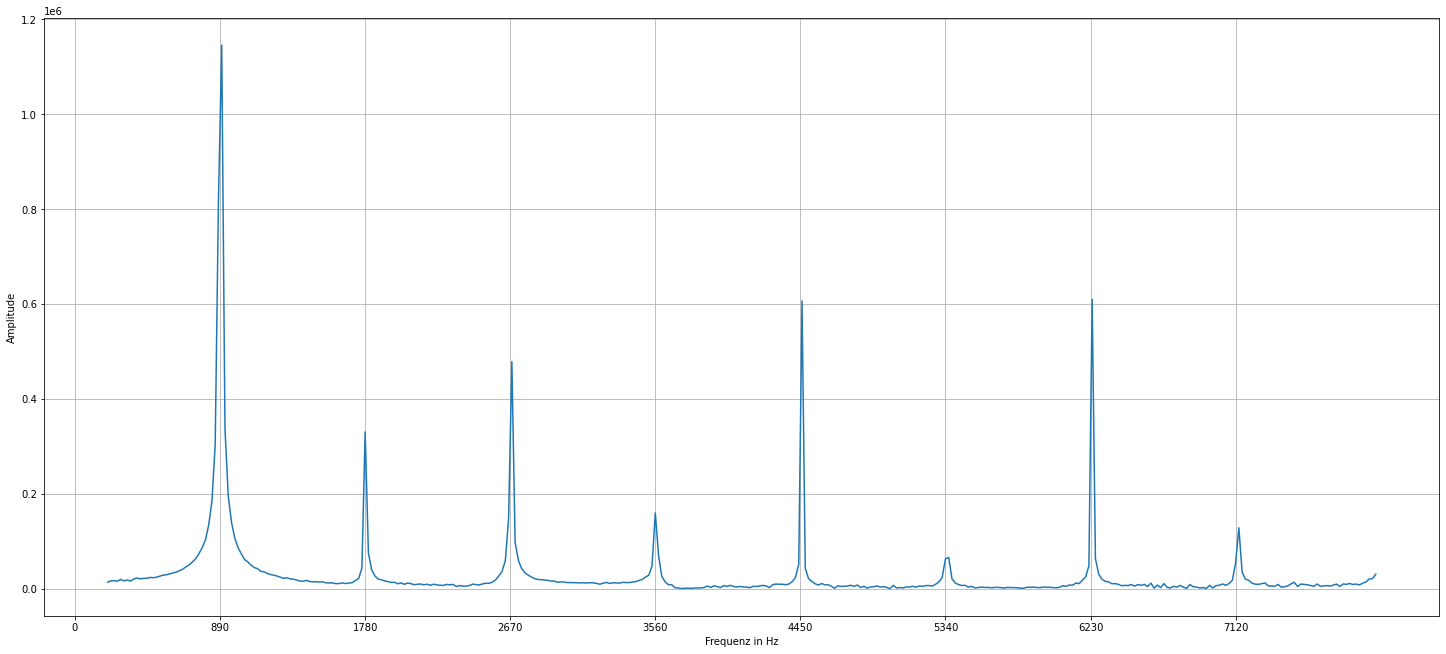

In [177]:
#Amplitudenspektrum
fq = []
for i in range(len(ft)):
    fq.append(i / (t / 1000))

#20000 nach Auge länge einer Periode ausgerechnete Grundfrequenz passt zum Graphen
period = data[0][20000]
freq = 1000/period


print(f"Periodendauer in ms [{period}]")
print(f"Frequenz in Hz [{freq}]")


efig, eax = plt.subplots(figsize=(25, 11))

eax.plot(fq[10:400], np.abs(ft[10:400]))

eax.set_xlabel('Frequenz in Hz')
eax.set_ylabel('Amplitude')

xWerte = np.arange(0, 8000, 890).tolist()
eax.set_xticks(xWerte)
eax.grid()

plt.show()

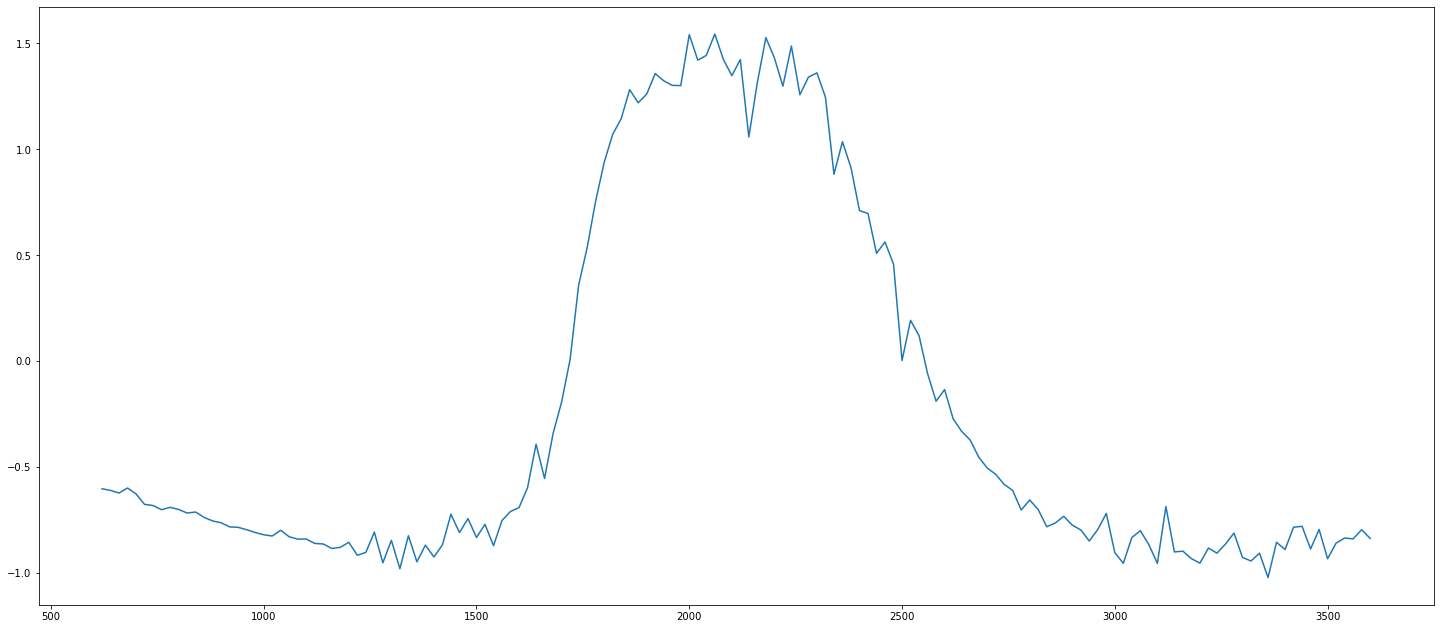

In [178]:
#Phasenspektrum

#-------------------------------------------------------------------------------- Sergios Code ------------------------------------------------------------
getDist = np.vectorize(lambda x: np.arctan(x.imag/x.real))
getFreq = np.vectorize(lambda x: round(x / (data[0][-1] / ((len(data)) * 1000) * len(data))))

freq = getFreq(np.array(range(1,len(ft)+1),dtype=int))
phase = getDist(ft)
#----------------------------------------------------------------------------------------------------------------------------------------------------------


eax.set_xlabel('Frequenz in Hz')
eax.set_ylabel('Arg() in Grad')


ffig, fax = plt.subplots(figsize=(25, 11))
plt.plot(freq[30:180], phase[30:180])

## Aufgabe 2

Bestimmen Sie für jeden der beiden Lautsprecher die Amplitude und die Phasenver-schiebung des akustischen Ausgangssignales, indem Sie sowohl Eingangs- als auch das Mikrofonsignal auf dem Oszilloskop darstellen. Übertragen Sie die Daten der Tabellen in Numpy-Arrays und stellen Sie Amplituden-und Phasengang graphisch dar. Erstellen Sie für beide Lautsprecher mithilfe von matplotlib ein Bode-Diagramm. Stellen Sie dazu beide Diagramme mit der Funktion semilogx() halblogarithmisch dar und berechnen Sie die zugehörigen Angaben in Dezibel nach der Formel aus der Vorlesung und den Phasenwinkel.

##### Daten

In [209]:
#Frequenzen
frequenzies = [
    100,
    200,
    300,
    400,
    500,
    700,
    850,
    1000,
    1200,
    1500,
    1700,
    2000,
    3000,
    4000,
    5000,
    6000,
    10000]

#Lautsprecher klein
amplitudeOuto = [
    9.92,
    18.69,
    26.74,
    45.76,
    113.6,
    68.11,
    50.74,
    41.38,
    38.63,
    37.9,
    33.46,
    35.99,
    40.17,
    40.17,
    16.18,
    12.7,
    18.84]

amplitudeIno = [
    1506,
    1499,
    1507,
    1500,
    1499,
    1491,
    1496,
    1494,
    1501,
    1495,
    1498,
    1500,
    1492,
    1500,
    1496,
    1492,
    1494]

phasengango = [
    8325,
    5352,
    3940,
    2973,
    2670,
    907,
    798,
    735,
    594,
    484,
    469,
    360,
    305,
    284,
    265,
    231,
    103]

#Lautsprecher gross
amplitudeInO = [
    1.491,
    1.508,
    1.495,
    1.494,
    1.494,
    1.497,
    1.501,
    1.492,
    1.499,
    1.501,
    1.494,
    1.494,
    1.491,
    1.493,
    1.492,
    1.499,
    1.494]

amplitudeOutO = [
    39.69,
    94.39,
    66.84,
    55.08,
    44.52,
    34.9,
    35.99,
    37.64,
    35.03,
    33.11,
    31.5,
    32.64,
    31.46,
    39.77,
    26.02,
    29.55,
    17.93]

phasengangO = [
    9599,
    6782,
    1831,
    1500,
    1285,
    897.6,
    764.6,
    694.1,
    619.8,
    514.2,
    463.3,
    404.6,
    307.8,
    274.5,
    256.9,
    224.6,
    95.52]


##### Code

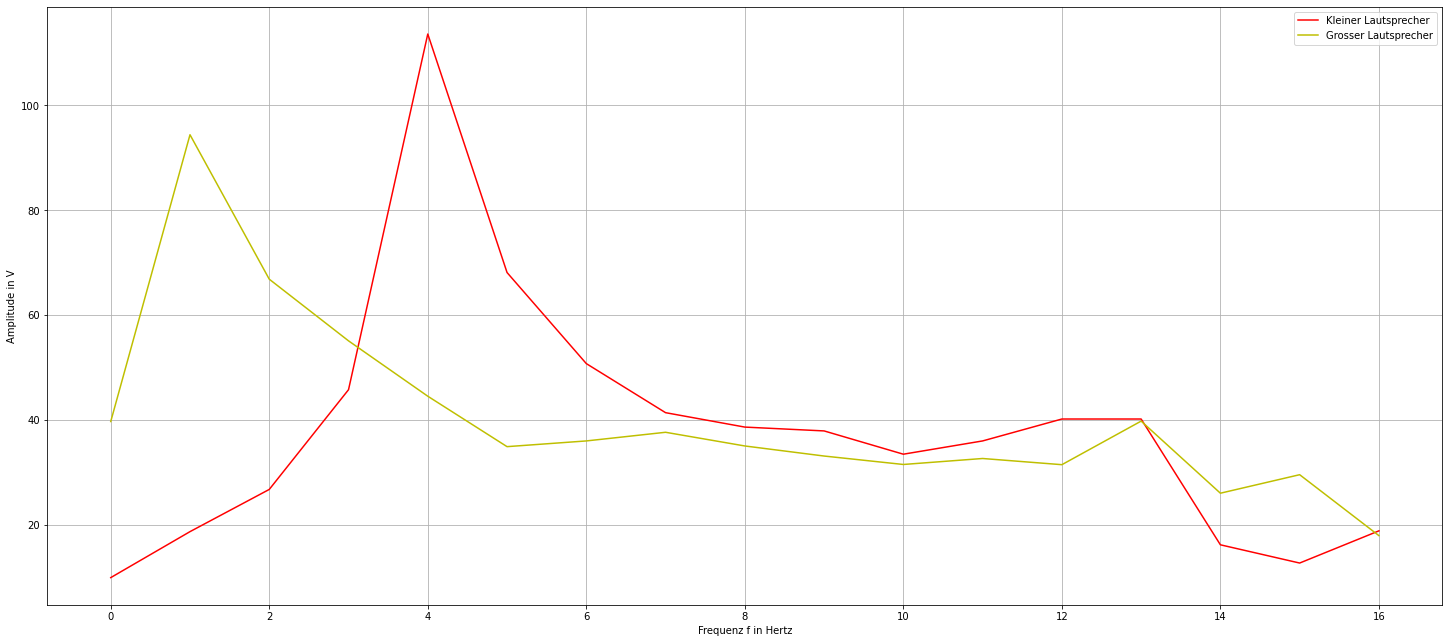

In [180]:
# Amplituden-Mittelwert für beide Lautsprecher je Frequenz

plt.figure(figsize=(25, 11))

plt.plot(amplitudeOuto, 'r', label='Kleiner Lautsprecher')
plt.plot(amplitudeOutO, 'y', label='Grosser Lautsprecher')

plt.ylabel('Amplitude in V')
plt.xlabel('Frequenz f in Hertz')

plt.grid(True)
plt.legend()
plt.show()



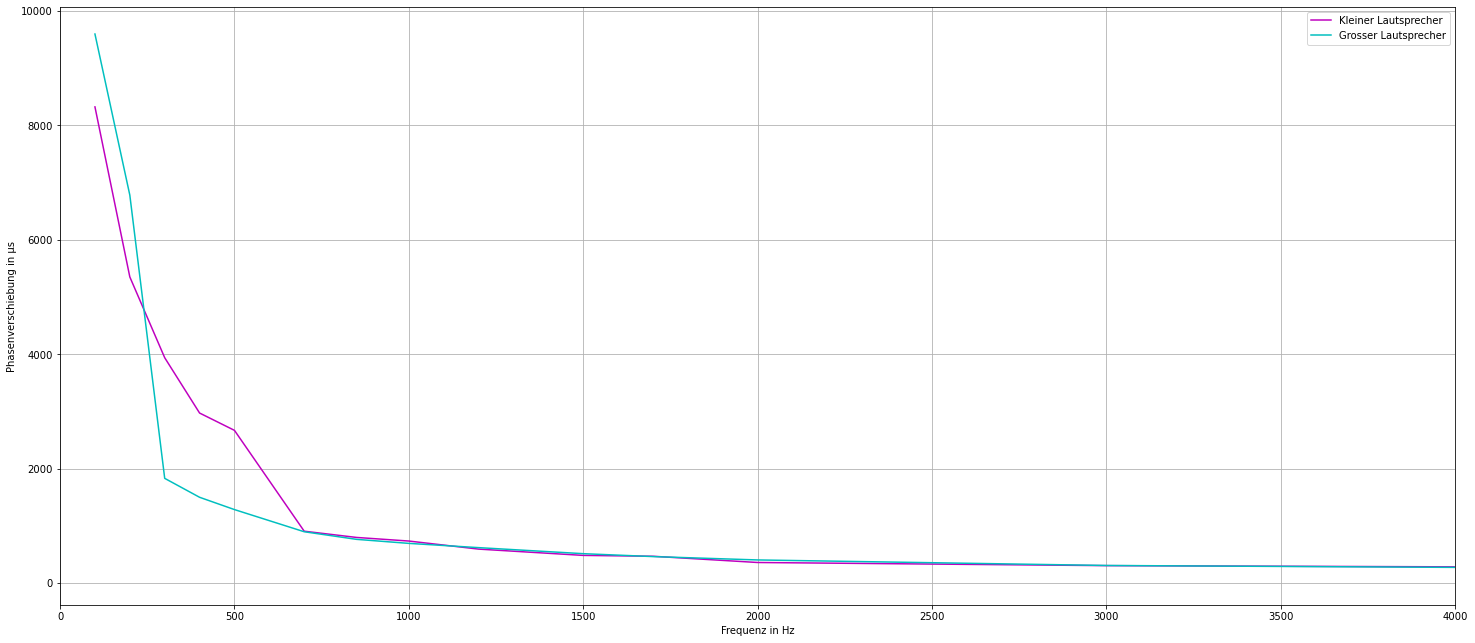

In [181]:
# Phasengang für beide Lautsprecher je Aufnahme (Nur die Hälfte)

plt.figure(figsize=(25, 11))

plt.plot(frequenzies, phasengango, 'm', label='Kleiner Lautsprecher')
plt.plot(frequenzies, phasengangO, 'c', label='Grosser Lautsprecher')


plt.ylabel('Phasenverschiebung in µs')
plt.xlabel('Frequenz in Hz')

plt.xlim(0, 4000)

plt.grid(True)
plt.legend()

plt.show()

In [208]:
#-------------------------------------------------------------------------- Funktionen von Sergio -------------------------------------------------------

def toPhasenwinkel(phasenwinkel):
    results = []
    for i in range(len(phasenwinkel)):
        results.append((phasenwinkel[i] * -1) * frequenzies[i] * 360)
    return results

def calcDecibels(voltages, voltages_ref):
    db = []
    for i in range(len(voltages)):
        db.append(20 * math.log10(voltages[i]/voltages_ref[i]))
    return db

#-------------------------------------------------------------------------------------------------------------------------------------------------------

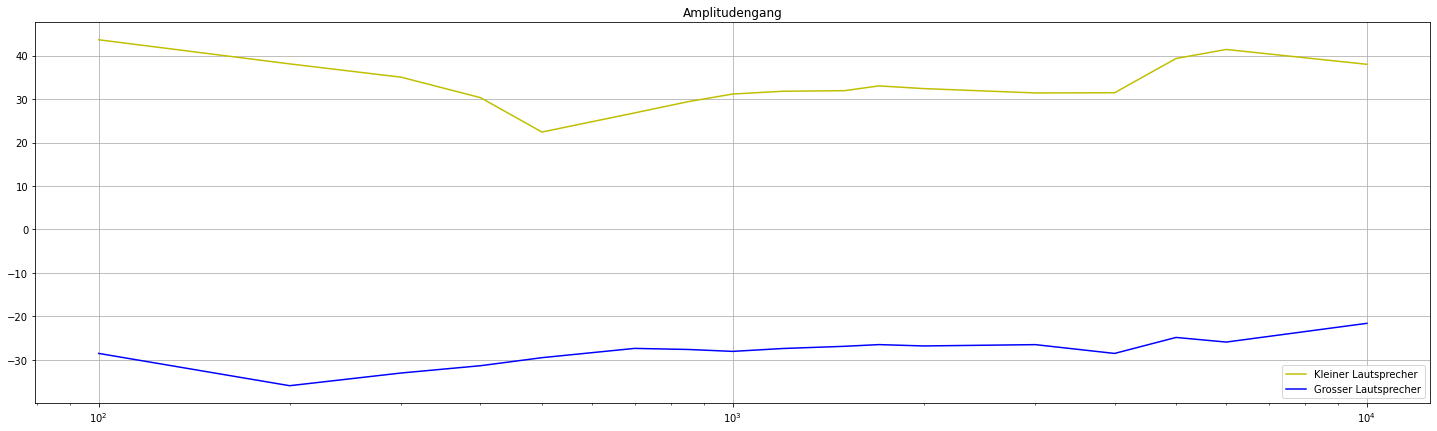

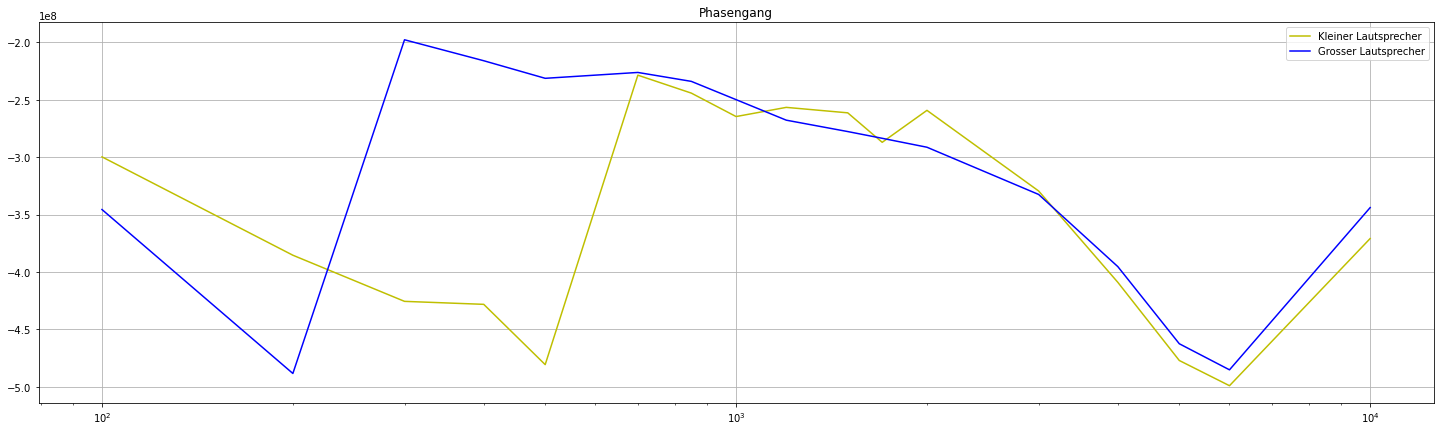

In [220]:
plt.figure(figsize=(25, 7))

#Amplitudengang
plt.plot(frequenzies, calcDecibels(amplitudeIno, amplitudeOuto), "y", label = "Kleiner Lautsprecher")
plt.plot(frequenzies, calcDecibels(amplitudeInO, amplitudeOutO), "b", label = "Grosser Lautsprecher")
plt.semilogx()


plt.title("Amplitudengang")
plt.grid()
plt.legend()

plt.show()


plt.figure(figsize=(25, 7))

#phasengang
plt.plot(frequenzies, toPhasenwinkel(phasengango), "y", label = "Kleiner Lautsprecher")
plt.plot(frequenzies, toPhasenwinkel(phasengangO), "b", label = "Grosser Lautsprecher")
plt.semilogx()



plt.title("Phasengang")
plt.grid()
plt.legend()

plt.show()